In [1]:
from urllib.request import Request
from urllib.parse import quote
from urllib.request import urlopen
from bs4 import BeautifulSoup
import collections
import numpy as np
import platform
import re
import matplotlib.pyplot as plt
import koreanize_matplotlib

from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
if not hasattr(collections, 'Callable'):
    collections.Callable = collections.abc.Callable

In [3]:
# lists

item_string_list = []
ants_list = []
city_list = []
degrees_list = []
workers_list = []

In [4]:
word = input("검색할 직무를 입력하세요. (ex.AI연구원, 데이터연구원, ...)")

In [5]:
def search_job(number):
    try:
        search_word = quote(word)
        url = f'https://www.saramin.co.kr/zf_user/search?search_area=main&search_done=y&search_optional_item=n&recruitPage={number}&recruitPageCount=100&searchType=search&searchword={search_word}'

        urlrequest = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        html = urlopen(urlrequest)

        soup = BeautifulSoup(html, 'html.parser')
        contents = soup.find('div', {'class':'content'})
        items = contents.select('div.job_sector > a[target="_blank"]')
        for item in items:
            item_string = item.text.replace('\n', '')
            item_string_list.append(item_string)
        return item_string_list
    
    except Exception as e:
        print(e)

def make_counter(number):
    try:
        search_word = quote(word)
        url = f'https://www.saramin.co.kr/zf_user/search?search_area=main&search_done=y&search_optional_item=n&recruitPage={number}&recruitPageCount=100&searchType=search&searchword={search_word}'

        urlrequest = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        html = urlopen(urlrequest)

        soup = BeautifulSoup(html, 'html.parser')
        contents = soup.find('div', {'class':'content'})
        items = contents.select('div.area_job > div.job_condition')
        # items = contents.select('div.job_sector > span.job_day')
        # item_string_list = []
        item_list = []
        for item in items:
            item_string = item.text.replace('\n', '').strip()
            # item_string = item.text.replace('\n', '')
            # print(item_string)
            try: 
                if item_string[2:4] == '전체':
                    item_string = item_string[0:2] + ' ' + item_string[2:]
            except:
                pass
            
            item_list.append(item_string)
        
            '''
            신입, 경력 여부 찾기
            '''
            antecedents = r'(신입·경력|경력무관|경력\d+년↑?|경력 \d+~\d+년|신입)'
            ants= re.findall(antecedents, item_string)
            for ant in ants:
                if len(ant) != 0:
                    ants_list.append(ant)

            '''
            학력 확인
            '''
            degrees = r'(고졸↑|초대졸↑|대졸↑|석사↑|박사↑|학력무관)'
            degs = re.findall(degrees, item_string)
            for deg in degs:
                degrees_list.append(deg)

            '''
            계약직, 정규직 확인
            '''
            workers = r'(정규직|계약직|인턴직)'
            works = re.findall(workers, item_string)
            for work in works:
                workers_list.append(work)

        '''
        지역 리스트 만들기
        '''
        for i in range(len(item_list)):
            city_list.append(item_list[i][:2])

        '''
        신입 경력 Counter
        '''
        # ants_counts = Counter(ants_list)

        '''
        지역 Counter
        '''
        # city_counts = Counter(city_list)
        return ants_list, city_list, degrees_list
    except Exception as e:
        print(e)

['연구원', 'CRM(임상연구전문가)', 'R&D;', 'R&D;기획', '기술연구', '빅데이터', 'AI(인공지능)', 'R', '연구원', 'R&D;', '빅데이터', 'IoT', 'AI(인공지능)', '연구원', 'R&D;', 'CRA(임상연구원)', 'CRC(연구간호사)', 'CRM(임상연구전문가)', 'QPS간호사', '정형외과', '기술지원', '유지보수', 'IT컨설팅', 'SE(시스템엔지니어)', 'ICT컨설팅', '데이터분석가', '데이터엔지니어', '딥러닝', '빅데이터', '영상의학과', '기술지원', '빅데이터', '정보통신', '사업기획', '사업관리', '연구원', '정책연구', '학술연구', '마케팅기획', '마케팅전략', '연구원', '헤드헌팅', '연구원', '헤드헌팅', '일반병원', '연구원', '생명과학', '세포실험', '생명공학', '교육행정', '교육기획', '교육운영', '교육컨텐츠기획', '대학교', '빅데이터', '연구원', '무인항공기/드론', '코딩', 'R', '데이터분석가', '빅데이터', 'AI(인공지능)', '데이터 사이언티스트', '딥러닝', '데이터라벨링', '데이터마이닝', '빅데이터', '연구원', '헬스케어', '연구원', '데이터', '데이터수집', '엑셀', '대학병원', '데이터라벨링', '연구원', '기술연구', '의료기기연구', 'AI(인공지능)', '공인회계사', '전산회계', '회계사', 'IR/공시', '더존', 'CRA(임상연구원)', 'CRM(임상연구전문가)', '진단검사의학과', '연구원', 'CRA(임상연구원)', 'SAP', '감사', '내부감사', '법인세신고', '부가세신고', 'R&D;', 'R&D;기획', '식품연구', '연구원', '음식료', '빅데이터', '연구원', 'R&D;', '기술연구', '분자진단', '데이터엔지니어', '보안컨설팅', '유지보수', '정보보안', 'SE(시스템엔지니어)', '연구원', 'R&D;', '기술연구', '정책연구', '제

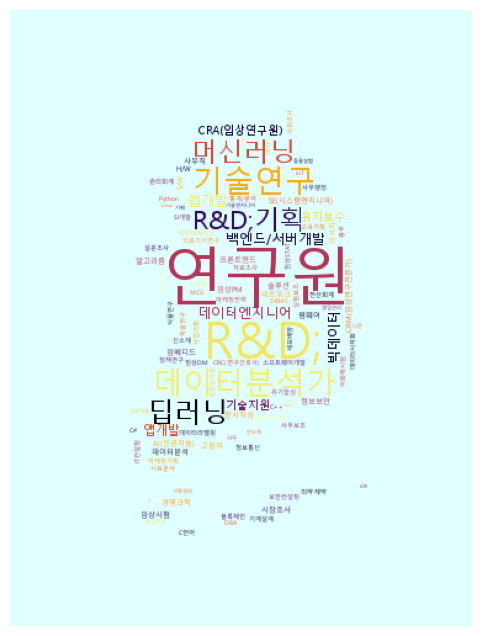

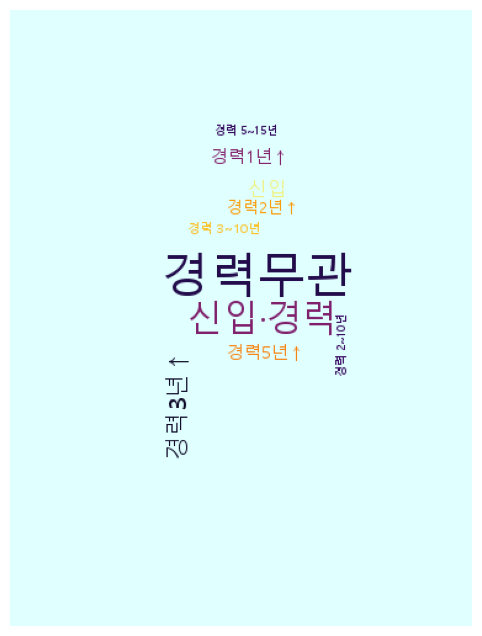

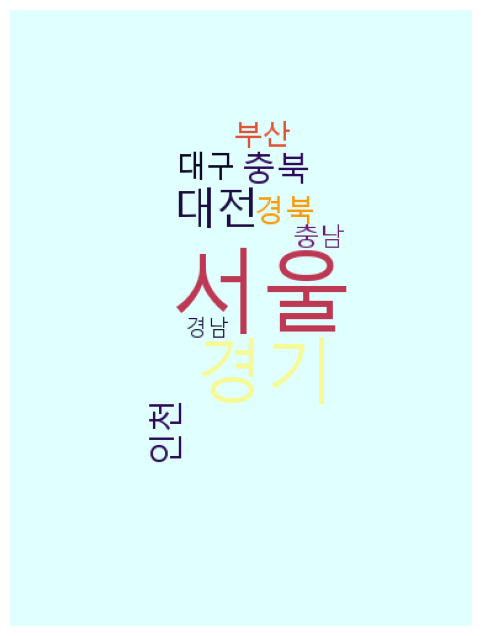

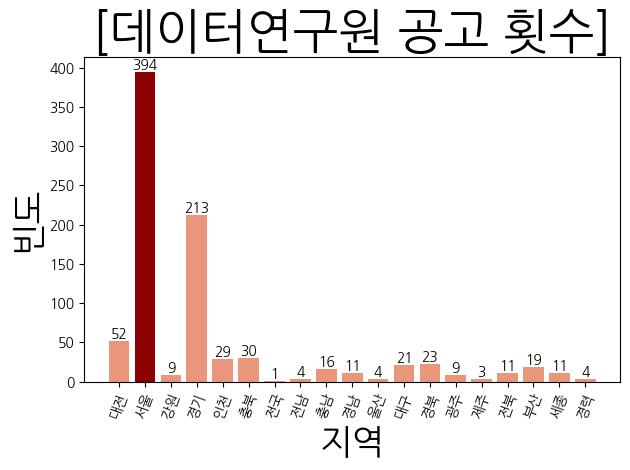

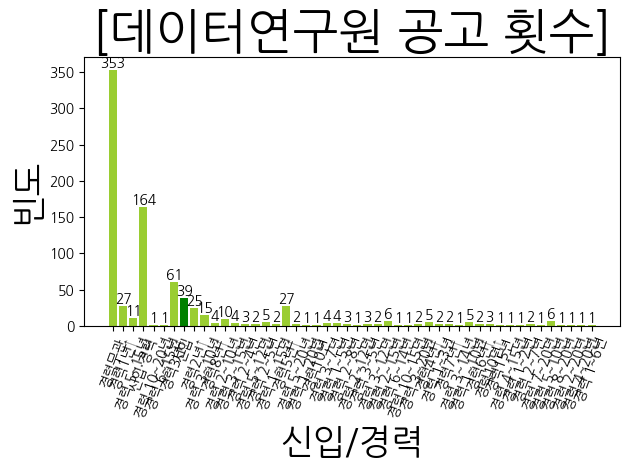

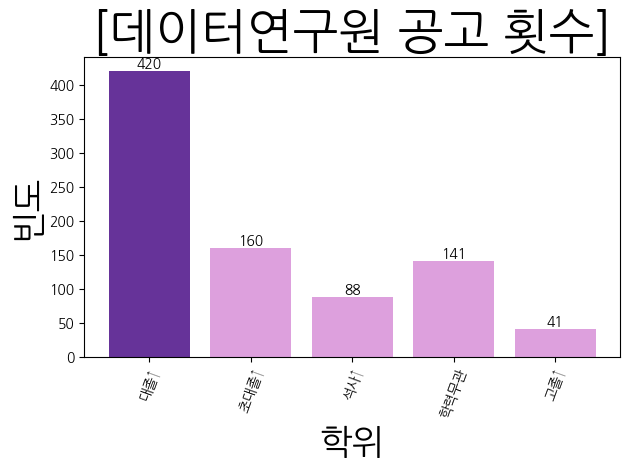

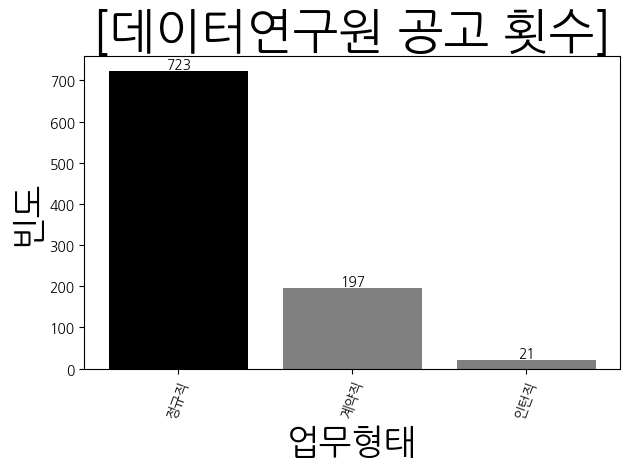

In [6]:
for i in range(1,10):
    search_job(i)
    make_counter(i)

def make_wordcloud(element_list, Count):
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    counts = Counter(element_list)
    tags = counts.most_common(Count)
    img_mask = np.array(Image.open('hanbando.jpg'))
    wc = WordCloud(font_path=path, width=400, height=400,
                background_color='white', max_font_size=200,
                repeat=False,
                colormap='Dark2', mask=img_mask)

    cloud = wc.generate_from_frequencies(dict(tags))

    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

'''
1.연관어, 2.신입/경력, 3.지역 워드클라우드
'''
make_wordcloud(item_string_list, 100)
make_wordcloud(ants_list, 10)
make_wordcloud(city_list, 30)

'''
bar 그래프 그리기
'''
ants_counts = Counter(ants_list)
city_counts = Counter(city_list)
degrees_counts = Counter(degrees_list)
workers_counts = Counter(workers_list)

def make_bar(element_counts, target_key='대구', changed_color='darkred', default_color='darksalmon', name='지역'):
    colors = [changed_color if key == target_key else default_color for key in element_counts.keys()]
    plt.title(f'[{word} 공고 횟수]', size=35)
    a = plt.bar(element_counts.keys(), element_counts.values(), color = colors)
    plt.bar_label(a, label_type='edge')
    plt.xlabel(name, size=25)
    plt.ylabel('빈도', size=25)
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.show()

make_bar(city_counts, target_key='서울')
make_bar(ants_counts, target_key='신입', changed_color='green', default_color='yellowgreen', name='신입/경력')
make_bar(degrees_counts, target_key='대졸↑', changed_color='rebeccapurple', default_color='plum', name='학위')
make_bar(workers_counts, target_key='정규직', changed_color='black', default_color='gray', name='업무형태')